#### Objective 1: Profiling and Exploring the Data

In [1]:
import pandas as pd

churn = pd.read_csv("Bank_Churn.csv")

churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [3]:
churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


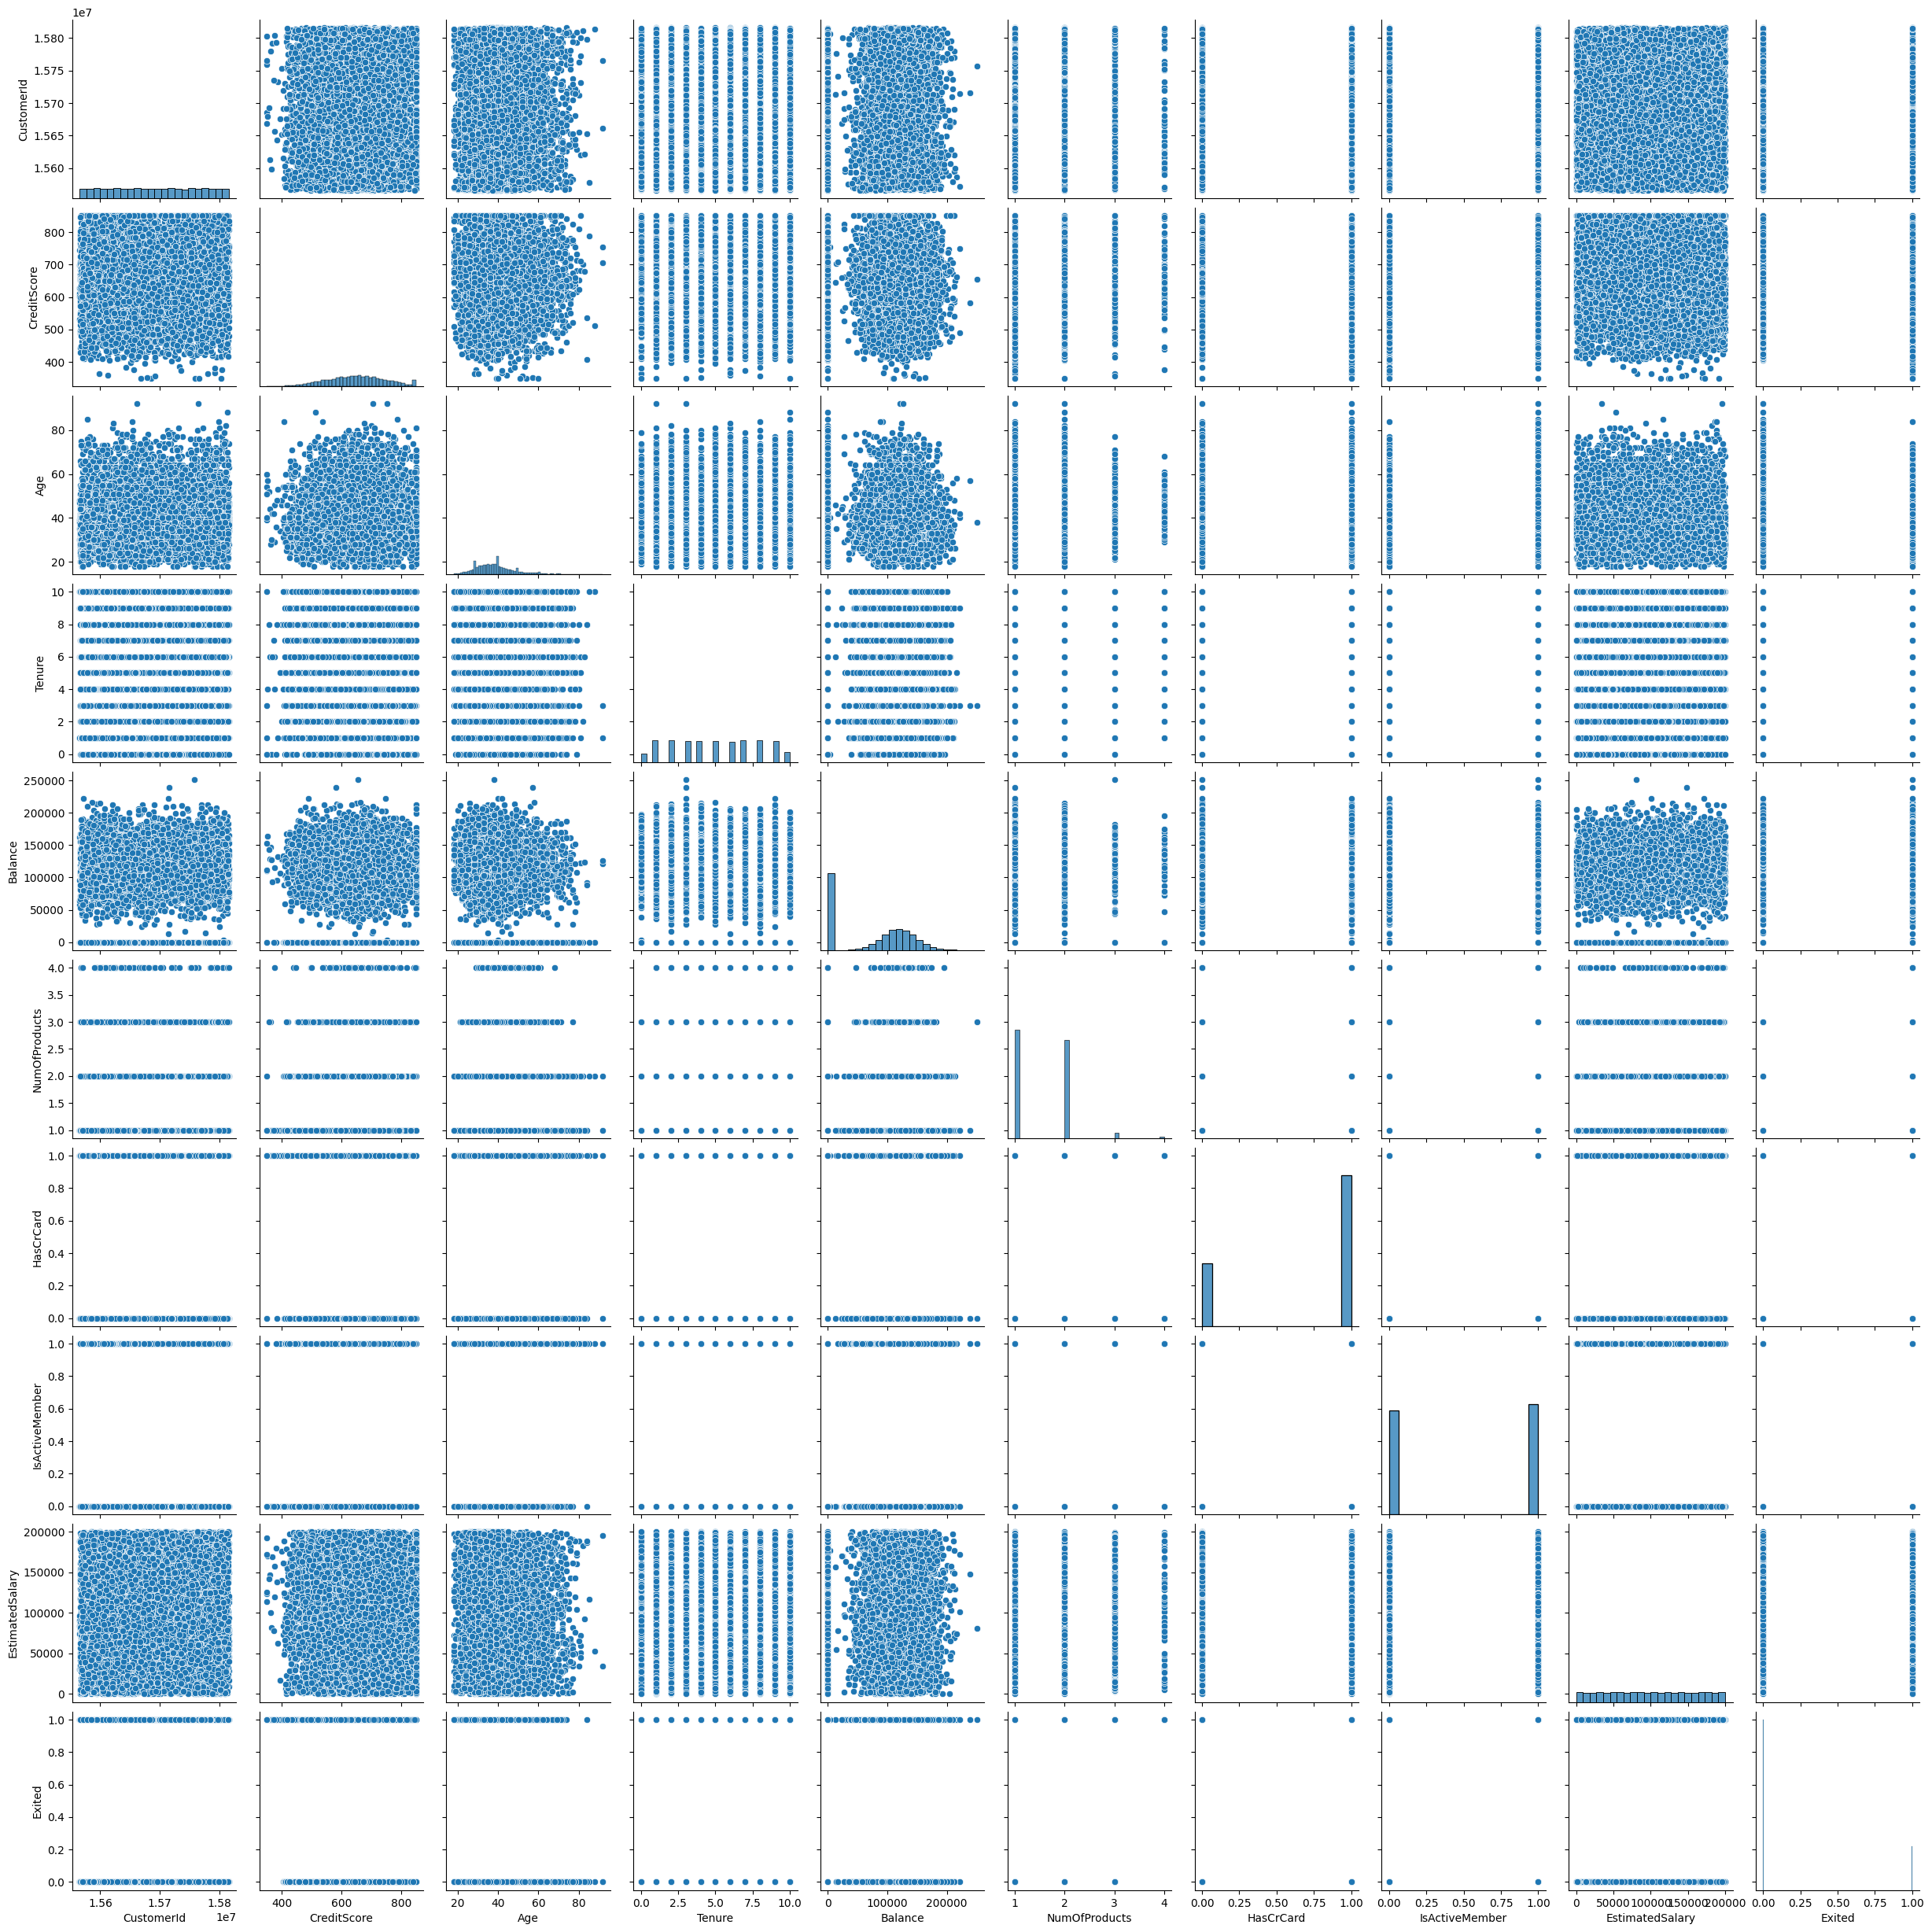

In [4]:
import seaborn as sns

sns.pairplot(churn)

<Axes: >

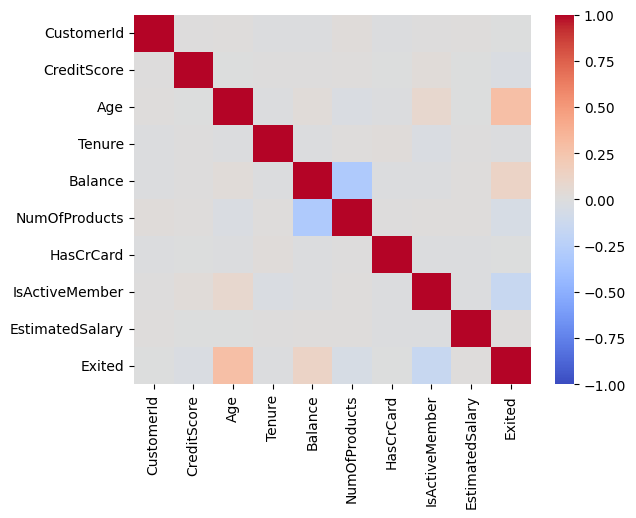

In [5]:
sns.heatmap(churn.corr(numeric_only=True), vmin=-1, vmax=1, cmap="coolwarm")

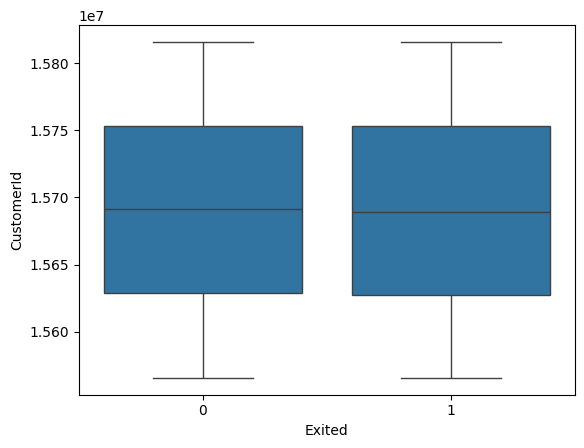

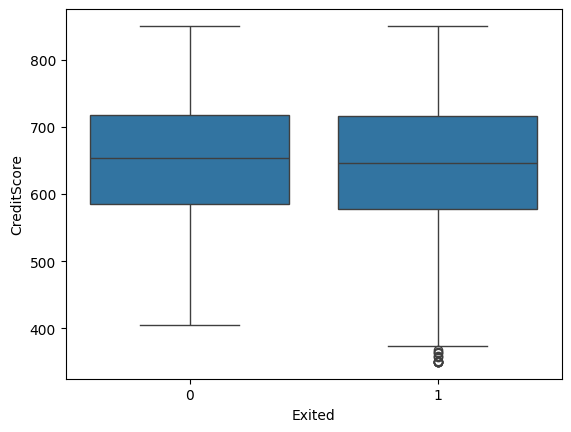

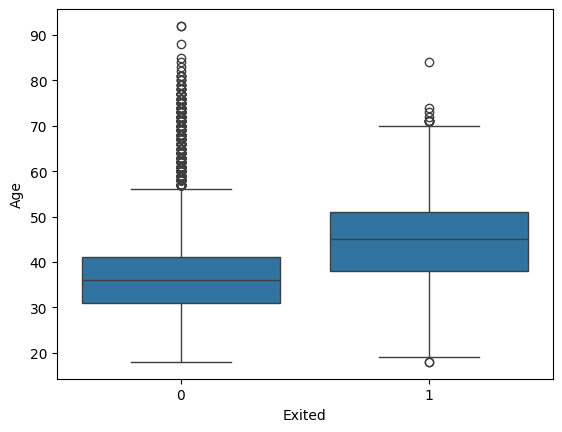

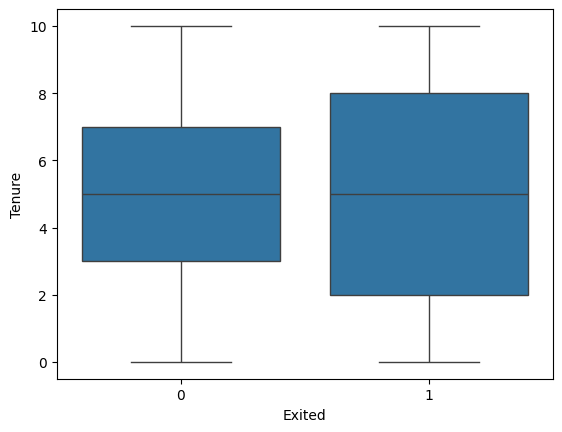

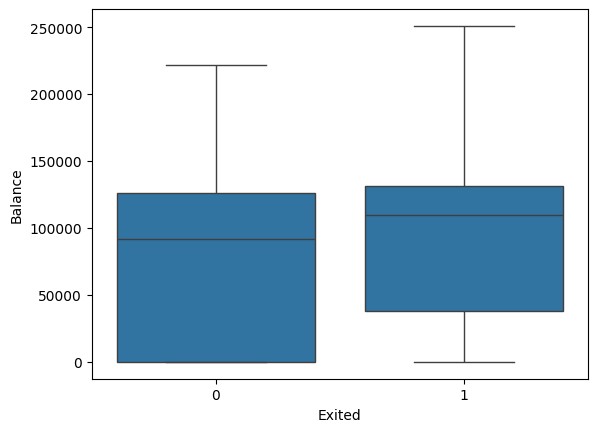

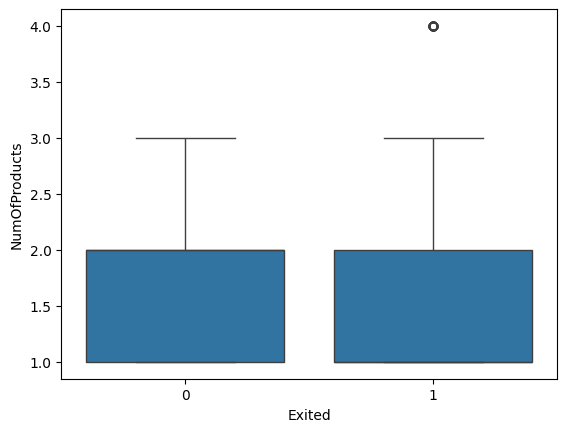

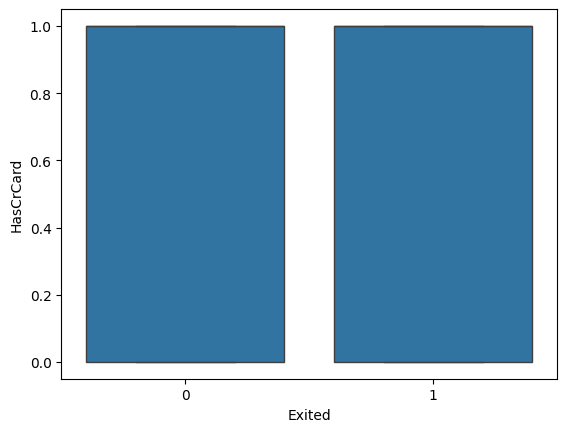

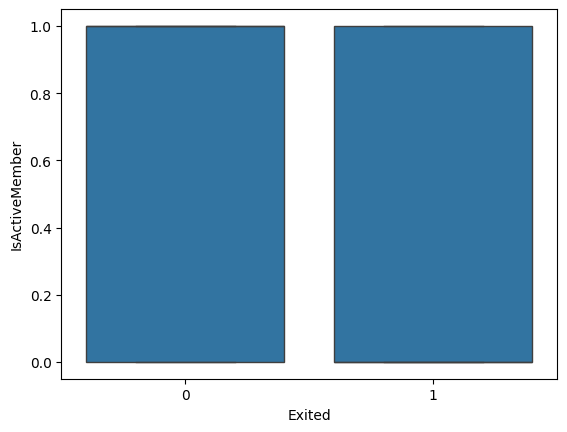

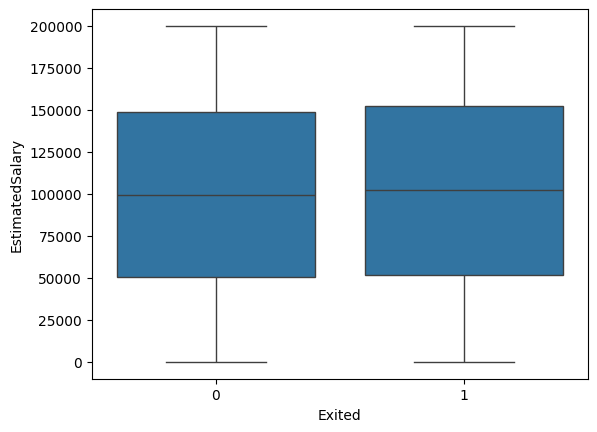

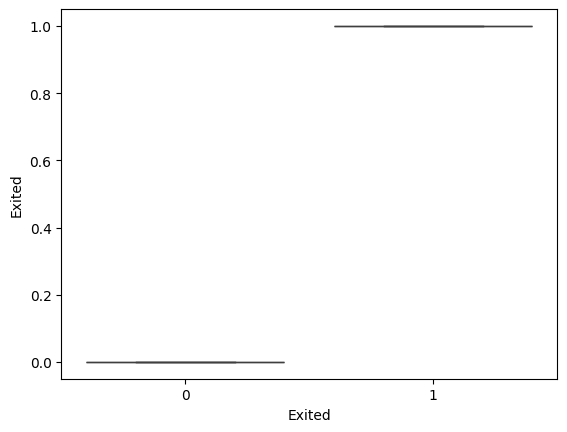

In [6]:
import matplotlib.pyplot as plt

for col in churn.select_dtypes("number"):
    sns.boxplot(data=churn, x="Exited", y=col)
    plt.show()

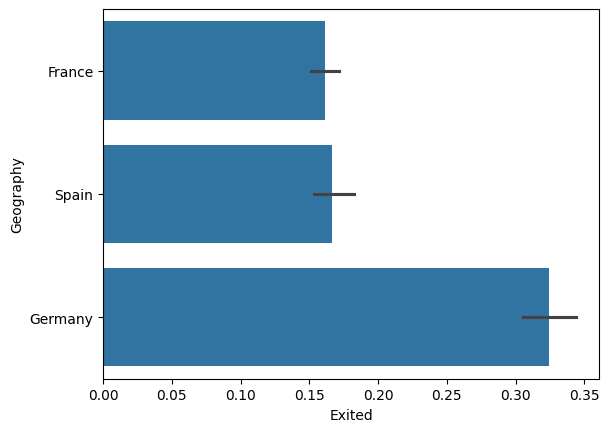

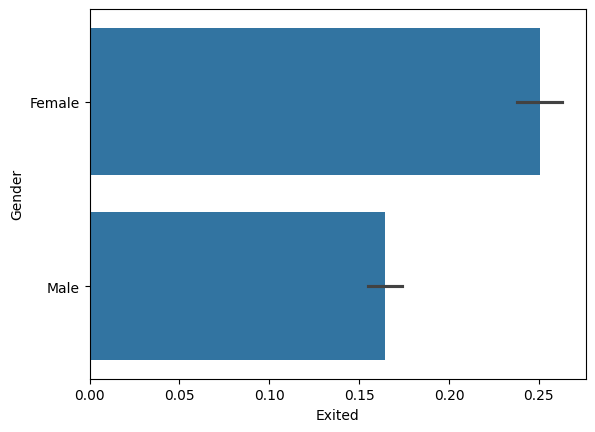

In [7]:
for col in churn.select_dtypes("object").columns[1:]:
    sns.barplot(data=churn, x="Exited", y=col)
    plt.show()

In [8]:
churn.select_dtypes("object")

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female
...,...,...,...
9995,Obijiaku,France,Male
9996,Johnstone,France,Male
9997,Liu,France,Female
9998,Sabbatini,Germany,Male


In [9]:
churn.select_dtypes("object").columns[1:]

Index(['Geography', 'Gender'], dtype='object')

#### Objective 2: Preparing for Modelling

In [10]:
churn.drop(["CustomerId", "Surname"], axis=1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
churn_modelling_df = churn.drop(["CustomerId", "Surname"], axis=1)

In [12]:
churn_modelling_df = churn_modelling_df.assign(
    balance_to_income = churn_modelling_df["Balance"] / churn_modelling_df["EstimatedSalary"], 
    income_v_product = churn_modelling_df["EstimatedSalary"] / churn_modelling_df["NumOfProducts"]
)

churn_modelling_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_v_product
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,101348.880
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,112542.580
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,37977.190
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,46913.315
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,79084.100


<Axes: xlabel='Exited', ylabel='balance_to_income'>

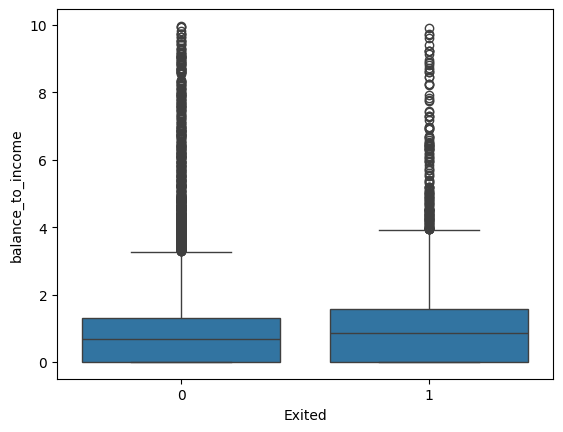

In [13]:
sns.boxplot(churn_modelling_df.query("balance_to_income < 10"), x="Exited", y="balance_to_income")

<Axes: xlabel='Exited', ylabel='income_v_product'>

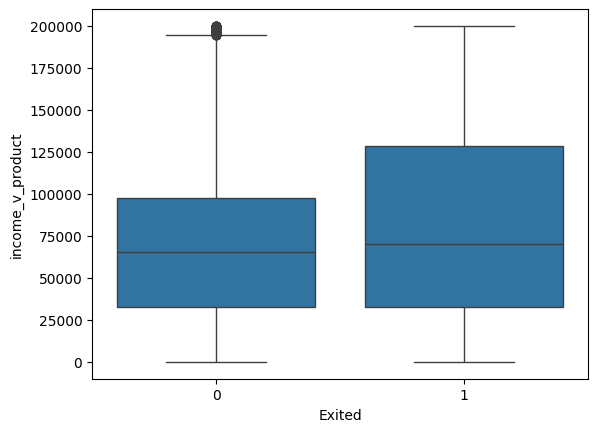

In [14]:
sns.boxplot(churn_modelling_df, x="Exited", y="income_v_product")

In [15]:
churn_modelling_df = pd.get_dummies(churn_modelling_df, drop_first=True, dtype="int")

churn_modelling_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,balance_to_income,income_v_product,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.000000,101348.880,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,112542.580,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,37977.190,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0.000000,46913.315,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,79084.100,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0.000000,48135.320,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0.564108,101699.770,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0.000000,42085.580,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0.808230,46444.260,1,0,1


In [16]:
from sklearn.model_selection import train_test_split

X = churn_modelling_df.drop("Exited", axis=1)
y = churn_modelling_df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 8276 to 7816
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   int64  
 1   Age                8000 non-null   int64  
 2   Tenure             8000 non-null   int64  
 3   Balance            8000 non-null   float64
 4   NumOfProducts      8000 non-null   int64  
 5   HasCrCard          8000 non-null   int64  
 6   IsActiveMember     8000 non-null   int64  
 7   EstimatedSalary    8000 non-null   float64
 8   balance_to_income  8000 non-null   float64
 9   income_v_product   8000 non-null   float64
 10  Geography_Germany  8000 non-null   int64  
 11  Geography_Spain    8000 non-null   int64  
 12  Gender_Male        8000 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 875.0 KB


In [17]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 8374 to 8466
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        2000 non-null   int64  
 1   Age                2000 non-null   int64  
 2   Tenure             2000 non-null   int64  
 3   Balance            2000 non-null   float64
 4   NumOfProducts      2000 non-null   int64  
 5   HasCrCard          2000 non-null   int64  
 6   IsActiveMember     2000 non-null   int64  
 7   EstimatedSalary    2000 non-null   float64
 8   balance_to_income  2000 non-null   float64
 9   income_v_product   2000 non-null   float64
 10  Geography_Germany  2000 non-null   int64  
 11  Geography_Spain    2000 non-null   int64  
 12  Gender_Male        2000 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 218.8 KB


#### Objective 3: Logistic Regression

In [ ]:
# X_train2 = X_train.drop(["Balance", "EstimatedSalary", "income_v_product"], axis=1)

In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver="newton-cholesky")

lr = logreg.fit(X_train, y_train)

print(f"Train Accuracy: {lr.score(X_train, y_train)}")

Train Accuracy: 0.817


In [19]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

confusion_matrix(y_train, lr.predict(X_train))

array([[6119,  253],
       [1211,  417]])

In [20]:
recall_score(y_train, lr.predict(X_train))

0.25614250614250617

In [21]:
list(zip(X_train, lr.coef_[0]))

[('CreditScore', np.float64(-0.0009187111129064403)),
 ('Age', np.float64(0.07348670677437193)),
 ('Tenure', np.float64(-0.015723073221588755)),
 ('Balance', np.float64(2.159495227819861e-06)),
 ('NumOfProducts', np.float64(0.7986881910560681)),
 ('HasCrCard', np.float64(-0.11739952340062901)),
 ('IsActiveMember', np.float64(-1.0796835443611241)),
 ('EstimatedSalary', np.float64(-1.7153764609830586e-05)),
 ('balance_to_income', np.float64(0.0005748891887945847)),
 ('income_v_product', np.float64(2.221317994433683e-05)),
 ('Geography_Germany', np.float64(0.7955740153693515)),
 ('Geography_Spain', np.float64(0.03551308451564065)),
 ('Gender_Male', np.float64(-0.49931440268313465))]

In [22]:
confusion_matrix(y_test, lr.predict(X_test))

array([[1536,   55],
       [ 320,   89]])

In [23]:
print(f"Test Accuracy: {lr.score(X_test, y_test)}")

Test Accuracy: 0.8125


In [24]:
precision_score(y_test, lr.predict(X_test))

0.6180555555555556

In [25]:
recall_score(y_test, lr.predict(X_test))

0.2176039119804401

In [26]:
f1_score(y_test, lr.predict(X_test))

0.321880650994575

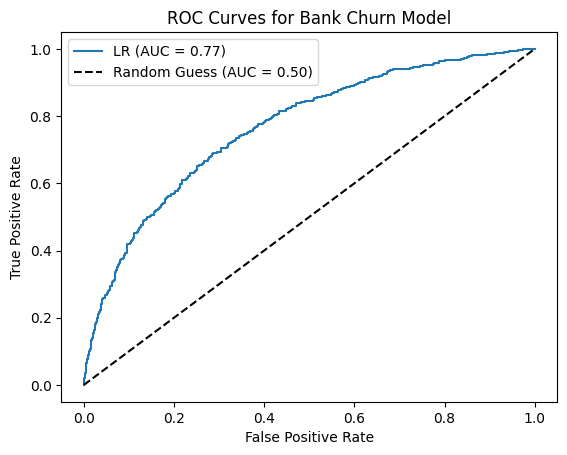

In [27]:
from sklearn.metrics import roc_curve, auc

y_probs = lr.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr1, tpr1)

# Plot the ROC curve
plt.plot(fpr1, tpr1, label=f'LR (AUC = {auc_score:.2f})')

# Draw Random Guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')

# Modify Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Bank Churn Model')
plt.legend()
plt.show()

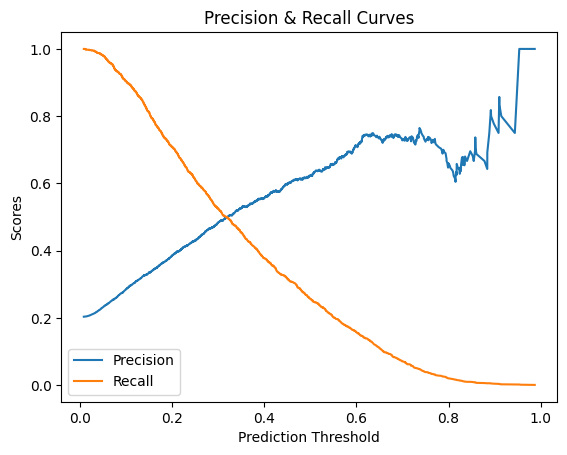

In [28]:
from sklearn.metrics import precision_recall_curve

p_curve, r_curve, t_curve = precision_recall_curve(y_train, lr.predict_proba(X_train)[:,1])

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Prediction Threshold')
plt.ylabel('Scores')
plt.legend()
plt.title('Precision & Recall Curves')
plt.show()

In [29]:
import numpy as np

np.where(p_curve > .5)

(array([6377, 6383, 6384, ..., 7998, 7999, 8000], shape=(1619,)),)

In [30]:
t_curve[6377]

np.float64(0.3197171449360368)

In [31]:
confusion_matrix(y_test, lr.predict_proba(X_test)[:, 1] > .32)

array([[1400,  191],
       [ 223,  186]])

In [32]:
recall_score(y_test, lr.predict_proba(X_test)[:, 1] > .32)

0.4547677261613692

In [33]:
precision_score(y_test, lr.predict_proba(X_test)[:, 1] > .32)

0.493368700265252

In [34]:
confusion_matrix(y_test, lr.predict_proba(X_test)[:, 1] > .34)

array([[1428,  163],
       [ 237,  172]])

In [35]:
recall_score(y_test, lr.predict_proba(X_test)[:, 1] > .34)

0.42053789731051344

In [36]:
precision_score(y_test, lr.predict_proba(X_test)[:, 1] > .34)

0.5134328358208955

#### Objective 4: Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf = rf.fit(X_train, y_train)

print(f"Train Accuracy: {lr.score(X_train, y_train)}")
print(f"Test Accuracy: {lr.score(X_test, y_test)}")

print(f"Train Accuracy: {rf.score(X_train, y_train)}")
print(f"Test Accuracy: {rf.score(X_test, y_test)}")

Train Accuracy: 0.817
Test Accuracy: 0.8125
Train Accuracy: 1.0
Test Accuracy: 0.8565


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

rf = RandomForestClassifier(random_state=2023, n_jobs=-1)

params = {
    'n_estimators': np.arange(start=100, stop=1100, step=100),
    'max_features': [None, "sqrt"],
    'bootstrap': [True],
    'max_samples': [None, .3, .5, .9],
    'max_depth': np.arange(start=1, stop=11, step=1),
    'min_samples_leaf': [2, 5, 10, 20, 100],
}

grid = RandomizedSearchCV(
    rf,
    params,
    n_iter=100,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

grid.best_params_

In [ ]:
# {'n_estimators': 900,
# 'min_samples_leaf': 10,
# 'max_samples': 0.5,
# 'max_features': None,
# 'max_depth': 10,
# 'bootstrap': True}

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': np.arange(start=850, stop=951, step=10),
    'max_samples': [.4, .5, .6],
    'max_depth': [8, 10, 12],
    'min_samples_leaf': [5, 10, 15]
}

grid = GridSearchCV(
    rf,
    params,
    scoring="accuracy"
)

grid.fit(X_train, y_train)

grid.best_params_

In [ ]:
# {'max_depth': 12,
# 'max_samples': 0.5,
# 'min_samples_leaf': 5,
# 'n_estimators': 890}

In [ ]:
rf = RandomForestClassifier(**{'n_estimators': 890, 
                               'min_samples_leaf': 5, 
                               'max_samples': 0.5, 
                               'max_depth': 12, 
                               'bootstrap': True})

rf = rf.fit(X_train, y_train)

print(f"Train Accuracy: {rf.score(X_train, y_train)}")
print(f"Test Accuracy: {rf.score(X_test, y_test)}")

In [ ]:
# Train Accuracy: 0.887375
# Test Accuracy: 0.8595

In [ ]:
from sklearn.metrics import roc_curve, auc

y_probs = rf.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds = roc_curve(y_test, y_probs)
auc_score = auc(fpr1, tpr1)

auc_score

In [ ]:
# 0.8509464146582472

In [ ]:
importance = pd.DataFrame(
    {"feature": X_train.columns, 
     "importance": rf.feature_importances_}
).sort_values("importance", ascending=False).iloc[:20]

sns.barplot(importance, x="importance", y="feature")